# Uvod u znanost o podacima (UZOP) - Projekt - Prvi dio

Ovaj dio projekta rješavate uz skup podataka kojeg će vam poslati asistent kod kojeg ste se prijavili. Ova vježba nosi ukupno 10 bodova. U slučaju bilo kakvih pitanja ili nejasnoća javite se nadležnom asistentu.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Učitajte danu CSV datoteku (climate_change_impact_on_agriculture_2024.csv) i prikažite prvih 8 redaka iz skupa podataka. (0,5 boda)

In [2]:
# KOD OVDJE
from pathlib import Path
# Bolje je koristiti Path umjesto string zbog prenosivosti medu operacijskim sustavima
filepath = Path("./climate_change_impact_on_agriculture_2024.csv")
df = pd.read_csv(filepath)
df.head(8)

,Entry,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Economic_Impact_Category
0,1,1990,France,Ile-de-France,Coffee,16.52,2102.28,16.42,2.448,0,51.34,44.54,79.02,91.99,No Adaptation,523.60,Medium
1,2,1990,France,Grand Est,Soybeans,15.23,1468.76,5.41,3.120,5,62.01,2.49,27.56,76.44,Drought-resistant Crops,1524.34,Very High
2,3,1990,India,Tamil Nadu,Soybeans,24.43,1191.16,1.37,1.300,8,12.78,34.80,40.96,61.55,Organic Farming,236.13,Low
3,4,1990,Nigeria,North West,Barley,-0.92,1081.11,14.02,2.430,5,17.30,42.33,68.93,41.63,Drought-resistant Crops,426.64,Low
4,5,1990,Russia,Northwestern,Coffee,24.42,1568.56,14.58,2.260,4,70.19,8.76,79.43,79.24,Drought-resistant Crops,911.84,Medium
5,6,1990,Nigeria,South West,Wheat,8.29,375.62,8.82,2.583,3,37.91,43.78,81.46,32.78,Organic Farming,931.57,Medium
6,7,1990,Nigeria,North West,Fruits,22.77,2193.41,22.21,1.863,1,27.64,34.07,NaN,77.09,Organic Farming,814.45,Medium
7,8,1990,Canada,British Columbia,Corn,30.65,2817.06,19.89,2.718,8,29.12,0.69,90.03,59.37,Drought-resistant Crops,1269.06,High


2. Pronađite monotone i konstantne vrijednosti i uklonite ih. (1 bod)

In [3]:
# KOD OVDJE
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

monotone_columns = []
for col in df.columns:
    if df[col].is_monotonic_increasing or df[col].is_monotonic_decreasing:
        monotone_columns.append(col)

columns_to_drop = constant_columns + monotone_columns
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.shape

(10000, 15)

3. Pronađite nedostajuće vrijednosti. Provedite zamjenu/uklanjanje nedostajućih vrijednosti odgovarajućim postupkom. Objasnite zašto ste primjenili odabrane postupke. (2 boda)

In [4]:
# KOD OVDJE
missing_values = df_cleaned.isnull().sum()
print("Broj nedostajućih vrijednosti po stupcima:")
print(missing_values)

df_cleaned['Total_Precipitation_mm'] = df_cleaned['Total_Precipitation_mm'].interpolate(method='linear')
df_cleaned['CO2_Emissions_MT'] = df_cleaned['CO2_Emissions_MT'].interpolate(method='linear')
df_cleaned['Fertilizer_Use_KG_per_HA'] = df_cleaned['Fertilizer_Use_KG_per_HA'].interpolate(method='linear')

Broj nedostajućih vrijednosti po stupcima:
Country                           0
Region                            0
Crop_Type                         0
Average_Temperature_C             0
Total_Precipitation_mm          800
CO2_Emissions_MT               1000
Crop_Yield_MT_per_HA              0
Extreme_Weather_Events            0
Irrigation_Access_%               0
Pesticide_Use_KG_per_HA           0
Fertilizer_Use_KG_per_HA       1200
Soil_Health_Index                 0
Adaptation_Strategies             0
Economic_Impact_Million_USD       0
Economic_Impact_Category          0
dtype: int64


4. Transformirajte kategoričke značajke (za koje ima smisla) u numeričke koristeći smisleni postupak. (1 bod)

In [5]:
# KOD OVDJE
#df_cleaned = pd.get_dummies(df_cleaned, columns=['Crop_Type'], drop_first=True)  # One-hot encoding
#df_cleaned = pd.get_dummies(df_cleaned, columns=['Adaptation_Strategies'], drop_first=True)  # One-hot encoding
impact_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4, 'Extreme': 5}  # Label encoding
df_cleaned['Economic_Impact_Category'] = df_cleaned['Economic_Impact_Category'].map(impact_mapping)

5. Za numeričke značajke prikažite srednju (mean), centralnu (median), minimalnu i maksimalnu vrijednost. Za kategoričke značajke ispišite učestalost pojavljivanja svake vrijednosti. (1,5 boda)

In [6]:
# KOD OVDJE
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

print("Statistika za numeričke značajke:")
for col in numerical_cols:
    print(f"\nZnačajka: {col}")
    print(f"  Srednja vrednost (mean): {df_cleaned[col].mean():.3f}")
    print(f"  Centralna vrednost (median): {df_cleaned[col].median():.3f}")
    print(f"  Minimalna vrednost: {df_cleaned[col].min()}")
    print(f"  Maksimalna vrednost: {df_cleaned[col].max()}")

print("\nUčestalost pojavljivanja za kategoričke značajke:")
for col in categorical_cols:
    print(f"\nZnačajka: {col}")
    print(df_cleaned[col].value_counts())

Statistika za numeričke značajke:

Značajka: Average_Temperature_C
  Srednja vrednost (mean): 15.241
  Centralna vrednost (median): 15.175
  Minimalna vrednost: -4.99
  Maksimalna vrednost: 35.0

Značajka: Total_Precipitation_mm
  Srednja vrednost (mean): 1610.439
  Centralna vrednost (median): 1606.708
  Minimalna vrednost: 200.15
  Maksimalna vrednost: 2999.67

Značajka: CO2_Emissions_MT
  Srednja vrednost (mean): 15.273
  Centralna vrednost (median): 15.275
  Minimalna vrednost: 0.5
  Maksimalna vrednost: 30.0

Značajka: Crop_Yield_MT_per_HA
  Srednja vrednost (mean): 2.240
  Centralna vrednost (median): 2.170
  Minimalna vrednost: 0.45
  Maksimalna vrednost: 5.0

Značajka: Extreme_Weather_Events
  Srednja vrednost (mean): 4.981
  Centralna vrednost (median): 5.000
  Minimalna vrednost: 0
  Maksimalna vrednost: 10

Značajka: Irrigation_Access_%
  Srednja vrednost (mean): 55.248
  Centralna vrednost (median): 55.175
  Minimalna vrednost: 10.01
  Maksimalna vrednost: 99.99

Značajka: 

6. Normalizirajte numeričke značajke. (1 bod)

In [7]:
# KOD OVDJE
for col in numerical_cols[:-1]:
    df_cleaned[col] = (df_cleaned[col] - df_cleaned[col].mean()) / df_cleaned[col].std()  # Standardizacija

df_cleaned.head()

,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Economic_Impact_Category
0,France,Ile-de-France,Coffee,0.111512,0.622097,0.136840,0.208329,-1.573343,-0.150388,1.351481,1.027870,1.341299,No Adaptation,-0.363417,2
1,France,Grand Est,Soybeans,-0.000985,-0.179200,-1.176134,0.881445,0.006033,0.260181,-1.550327,-0.815271,0.571340,Drought-resistant Crops,2.050381,4
2,India,Tamil Nadu,Soybeans,0.801320,-0.530317,-1.657915,-0.941578,0.953659,-1.634132,0.679338,-0.335324,-0.165939,Organic Farming,-1.056799,1
3,Nigeria,North West,Barley,-1.409380,-0.669512,-0.149366,0.190299,0.006033,-1.460208,1.198972,0.666477,-1.152278,Drought-resistant Crops,-0.597286,1
4,Russia,Northwestern,Coffee,0.800448,-0.052970,-0.082585,0.020016,-0.309842,0.574938,-1.117644,1.042555,0.709982,Drought-resistant Crops,0.573023,2


7. Napravite složeni graf s 4 podgrafa (2 retka i 2 stupca). Dodajte nazive podgrafova i označite osi na svakom od njih. Vizualizirajte sljedeće: (3 boda)
  - Histogram proizvoljne kategoričke značajke
  - Pitni graf ciljne varijable ('Economic_Impact_Category')
  - Kutijasti graf proizvoljne numeričke varijable
  - Graf raspršenja proizvoljne 2 numeričke varijable. Obojajte uzorke s obzirom na vrijednost ciljne varijable.

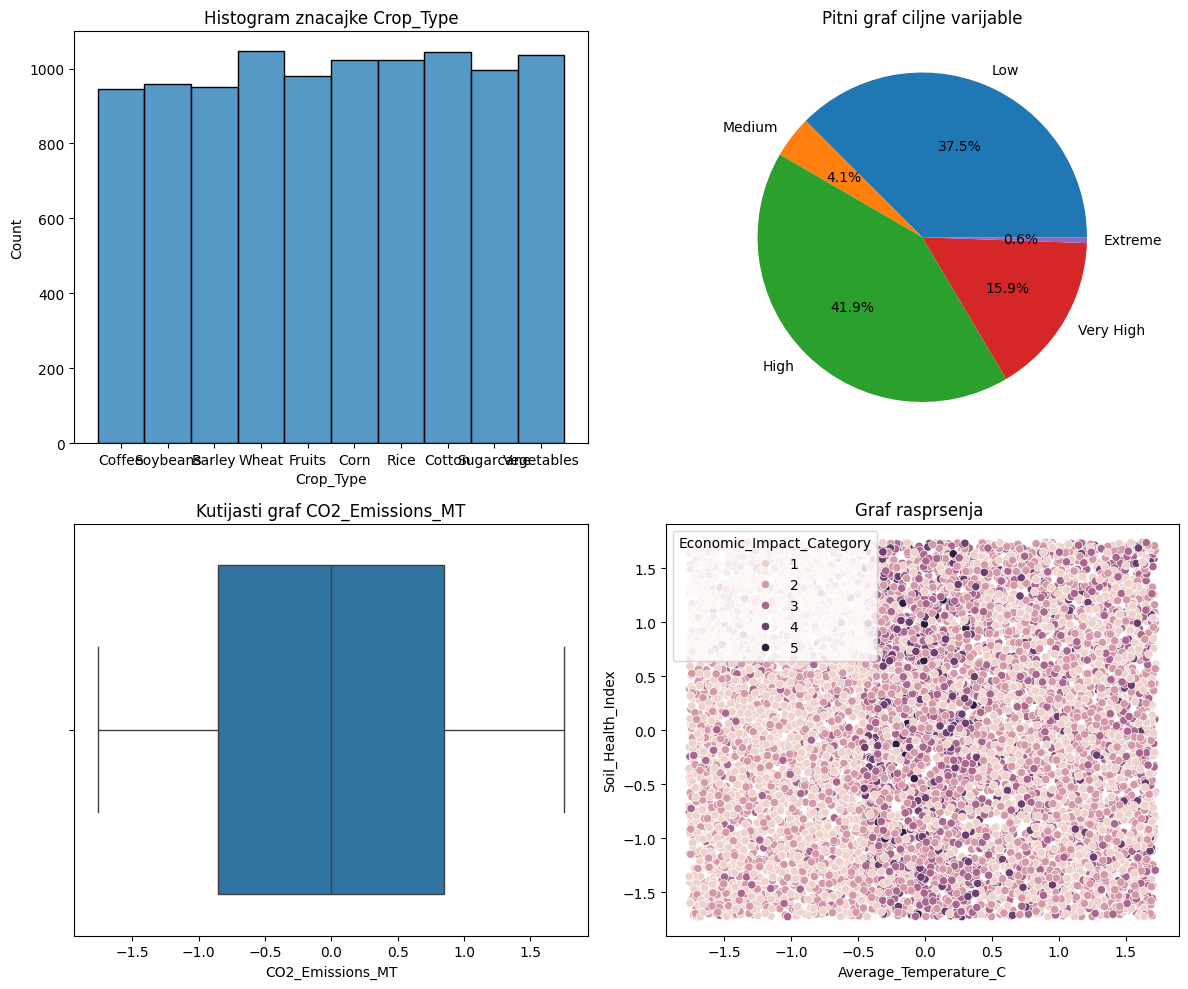

In [8]:
# KOD OVDJE
from collections import Counter

counter = Counter(df_cleaned["Economic_Impact_Category"])
fig, axs = plt.subplots(2,2, figsize=(12,10))

sns.histplot(df_cleaned, x="Crop_Type", ax=axs[0, 0])
axs[0][1].pie(dict(counter).values(), labels=impact_mapping.keys(), autopct='%1.1f%%')
sns.boxplot(df_cleaned, x="CO2_Emissions_MT", ax=axs[1, 0])
sns.scatterplot(df_cleaned, x="Average_Temperature_C", y="Soil_Health_Index",
                hue="Economic_Impact_Category", ax=axs[1][1])

axs[0][0].set_title("Histogram znacajke Crop_Type")
axs[0][1].set_title("Pitni graf ciljne varijable")
axs[1][0].set_title("Kutijasti graf CO2_Emissions_MT")
axs[1][1].set_title("Graf rasprsenja ")

fig.tight_layout()